In [20]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt # plot 관련
import matplotlib.font_manager # font 관련
import seaborn as sns # plot 관련
from wordcloud import WordCloud
from konlpy.tag import Twitter, Kkma # 단어 처리
from sklearn.feature_extraction.text import CountVectorizer
import operator
%matplotlib inline
import networkx
matplotlib.style.use('ggplot')
import psycopg2

In [29]:
def get_word(doc):
    '''길이가 2 이상인 단어 및 필요없는 단어 제거'''
    tagger = Twitter()
    nouns = tagger.nouns(doc)
    
    remove_noun = []
    with open('remove_noun.txt', 'r', newline='\r\n', encoding='utf8') as f:
        for line in f.readlines():
            remove_noun.append(line.strip())
            
    res = []
    for noun in nouns:
        if ((len(noun) > 1) & (noun not in remove_noun)) :
            res.append(noun)
    
    return res

In [5]:
conn = psycopg2.connect("host='localhost' dbname='db_book' user='postgres' password='1234'")

In [6]:
cur = conn.cursor()

In [7]:
cur.execute("SELECT book_essay from book_info where cate_cd='901'")

In [8]:
aa = cur.fetchall()

In [9]:
type(aa)

list

In [10]:
aa

[('',),
 ("너무 머리써야 하고 생각해야 하는 책들을 읽어서 쉬어갈겸 선택한 책이다. 그런데 쉬어가기엔 책의 두께가 좀 두꺼웠다. 예전에 책을 막 읽기 시작했을 때 읽었던 '창문을 넘어 도망친 100세 노인' 을 읽었을 때 재미있고 좋은 기억이 있었고, 표지도 그 책과 비슷하여 선택했다. 내용은 어느 한 요양소에 있는 5명의 노인들이 자신들을 가두고 있다고 느껴서 작은 일탈 부터 시작해서 나중에는 은행을 터는 내용이다. 메르타라는 할머니를 중심으로 이야기 전개가 이루어 진다. 이야기 중간에 벌써 감옥에 갔나 해서 싱겁게 끝나나 했더니 감옥에서 다시 요양소 복귀 하며 은행을 털것을 미리 계획하면서 2차적인 범죄가 진행되는게 흥미진진하다. 읽어보면 그저 노인들의 일탈을 얘기하는 것 같지만 그 속에는 자기들 이익을 챙기는 부자들에 대한 소심하지만 통쾌한 복수도 느낄 수 있는 책이었다. ",),
 ('생각이 많아지다 보니 책 읽을때도 굳이 생각하기 싫어지고 그냥 물 흘러가듯이 읽기 위해 택한 또 한권의 소설이다. 재밌게 읽으려 했으나 막상 ebook으로 보니 두께가 엄청났다. ebook의 문제점이다. 그래도 소설이니 굵직한 줄거리만 알면 부담없겠다 생각하며 읽었다. 내용은 한때 유망한 레슬링 선수가 될뻔한 학생이 부모를 먼저 떠나보내게 되고, 마약에 손을 대며 살인을 저질러서 감옥에 살게 되었다. 그렇게 마약중독자란 표식을 달고 살면서 모든 살인 사건에 항상 연관되어 조사를 받아가는 과정에서 자기 아버지가 어떻게 죽게됐는지를 알게 되며 어느 순간 약을 끊게 되었다. 그 후 감옥을 나가기 위해 같이 생활한 죄수에게 나가도록 부탁한 뒤 감옥을 탈출하게 된다. 그 뒤로 자기 아버지를 죽인 자들을 차례로 심판을 해 나가는 내용이다. 그들을 죽이면서 차츰 내막을 알게 되어 아버지의 친한 친구가 아버지를 죽인것도 알게 되었다. 난 주인공이 다 죽이고 잡혀 들어가는 걸로 끝날 줄 알았지만 경찰의 눈을 피해 탈옥 후 만났던 여자와 같이 떠나는 결말이 나올 줄은 몰랐다. 초반

In [11]:
bb = list(sum(aa, ()))

In [121]:
# tagger = Twitter()
tagger = Kkma()
cv = CountVectorizer(tokenizer=get_word, max_features=300)
tdf = cv.fit_transform(bb)
words = cv.get_feature_names()
print (words)

['간신', '감옥', '감정이입', '개인', '결말', '경찰', '고구려', '고민', '고사유', '관계', '교도관', '교도소', '구부', '구성', '군사', '기억', '기적', '김영하', '난관', '남편', '네스', '대가', '도망', '등장인물', '마약', '마을', '마음가짐', '마이크', '마티스', '맥락', '메시지', '명령', '명의', '목사', '목숨', '문제점', '미궁', '밀리언셀러', '반전', '백성', '뱃사람', '범죄', '보스', '복귀', '복수', '부모', '부부', '부자', '블러드', '사건', '사냥', '사랑', '사형', '사형수', '살인', '선사', '성격', '세력', '세상', '소수림왕', '소심', '손아귀', '스노우', '스토리', '시기', '시리즈', '시절', '신뢰', '신분', '심사', '심성', '심판', '싸움', '악당', '안나', '역사', '연관', '열망', '영화', '올라브', '요양소', '요한센', '유방', '을불', '이익', '인간', '인재', '인지', '일탈', '자존심', '잡화', '장기', '재미', '적재적소', '제도', '조고', '죄수', '죄인', '주민', '주제', '죽음', '중국', '지문', '직원', '진시황', '질투', '창문', '천재', '청부', '추리', '추리소설', '캐릭터', '크누트', '클럽', '킬러', '탈옥', '통일', '통쾌', '페이지', '편지', '표지', '항우', '해결', '해석', '행동', '흥미진진', '희망']


In [122]:
count_mat = tdf.sum(axis=0) # 열별로 단어별 출현 빈도 합계 구함(axis = 1 , 각 문서별 명사의 사용 개수)
count = np.squeeze(np.asarray(count_mat)) # 대괄호가 하나로 줄어듬. 좀더 데이터 핸들링을 쉽게 하기 위해 리스트 형태로 해줌
print (count)

[1 5 2 1 2 1 1 3 1 1 1 1 3 1 4 3 2 1 1 2 1 1 1 2 2 3 1 1 1 1 1 1 1 1 1 1 1
 1 3 1 2 1 7 1 1 1 1 1 2 7 1 3 6 2 4 1 1 3 2 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 2 1 7 1 1 1 2 2 2 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 2 1 1 2 1 2 1
 1 2 1 4 1 2 1 2 1 1 5 1 1 1 2 1]


In [129]:
word_count = dict(zip(words, count))
word_count

{'간신': 1,
 '감옥': 5,
 '감정이입': 2,
 '개인': 1,
 '결말': 2,
 '경찰': 1,
 '고구려': 1,
 '고민': 3,
 '고사유': 1,
 '관계': 1,
 '교도관': 1,
 '교도소': 1,
 '구부': 3,
 '구성': 1,
 '군사': 4,
 '기억': 3,
 '기적': 2,
 '김영하': 1,
 '난관': 1,
 '남편': 2,
 '네스': 1,
 '대가': 1,
 '도망': 1,
 '등장인물': 2,
 '마약': 2,
 '마을': 3,
 '마음가짐': 1,
 '마이크': 1,
 '마티스': 1,
 '맥락': 1,
 '메시지': 1,
 '명령': 1,
 '명의': 1,
 '목사': 1,
 '목숨': 1,
 '문제점': 1,
 '미궁': 1,
 '밀리언셀러': 1,
 '반전': 3,
 '백성': 1,
 '뱃사람': 2,
 '범죄': 1,
 '보스': 7,
 '복귀': 1,
 '복수': 1,
 '부모': 1,
 '부부': 1,
 '부자': 1,
 '블러드': 2,
 '사건': 7,
 '사냥': 1,
 '사랑': 3,
 '사형': 6,
 '사형수': 2,
 '살인': 4,
 '선사': 1,
 '성격': 1,
 '세력': 3,
 '세상': 2,
 '소수림왕': 2,
 '소심': 1,
 '손아귀': 1,
 '스노우': 2,
 '스토리': 1,
 '시기': 2,
 '시리즈': 1,
 '시절': 1,
 '신뢰': 1,
 '신분': 1,
 '심사': 1,
 '심성': 1,
 '심판': 1,
 '싸움': 1,
 '악당': 1,
 '안나': 1,
 '역사': 1,
 '연관': 1,
 '열망': 1,
 '영화': 2,
 '올라브': 1,
 '요양소': 2,
 '요한센': 1,
 '유방': 7,
 '을불': 1,
 '이익': 1,
 '인간': 1,
 '인재': 2,
 '인지': 2,
 '일탈': 2,
 '자존심': 1,
 '잡화': 1,
 '장기': 1,
 '재미': 3,
 '적재적소': 1,
 '제도': 1,
 '조고': 1,
 '죄수': 

In [124]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

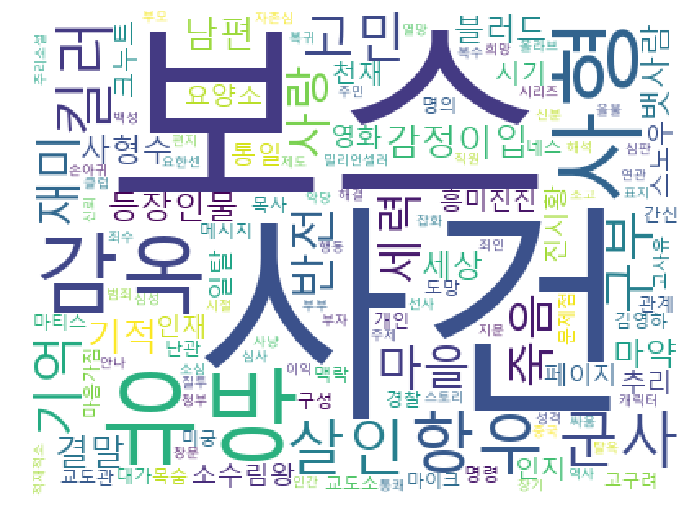

In [125]:
plt.figure(figsize=(12, 9))
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [126]:
word_corr = np.corrcoef(tdf.todense(), rowvar=0) # 상관계수 구하기(rowvar =0 : 컬럼단위 상관계수, 1이면 문서간의 상관계수)
print (word_corr)

[[ 1.         -0.06753674 -0.04761905 ..., -0.04761905 -0.06900656
  -0.04761905]
 [-0.06753674  1.         -0.06753674 ..., -0.06753674  0.33275812
  -0.06753674]
 [-0.04761905 -0.06753674  1.         ..., -0.04761905 -0.06900656  1.        ]
 ..., 
 [-0.04761905 -0.06753674 -0.04761905 ...,  1.         -0.06900656
  -0.04761905]
 [-0.06900656  0.33275812 -0.06900656 ..., -0.06900656  1.         -0.06900656]
 [-0.04761905 -0.06753674  1.         ..., -0.04761905 -0.06900656  1.        ]]


In [127]:

edges = []
for i in range(len(words)): 
    for j in range(i + 1, len(words)): 
        edges.append((words[i], words[j], word_corr[i, j])) # 1이 아닌 및부분의 상관계수 추리기

edges = sorted(edges, key=operator.itemgetter(2), reverse=True) # 상관게수가 높은걸로 정렬
edges = edges[:50]
print (edges)

edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

[('간신', '백성', 1.0), ('간신', '시리즈', 1.0), ('간신', '심사', 1.0), ('간신', '싸움', 1.0), ('간신', '역사', 1.0), ('간신', '유방', 1.0), ('간신', '인재', 1.0), ('간신', '조고', 1.0), ('간신', '중국', 1.0), ('간신', '진시황', 1.0), ('간신', '질투', 1.0), ('간신', '통일', 1.0), ('간신', '항우', 1.0), ('개인', '김영하', 1.0), ('개인', '마음가짐', 1.0), ('개인', '메시지', 1.0), ('개인', '인간', 1.0), ('개인', '주제', 1.0), ('개인', '해석', 1.0), ('경찰', '마약', 1.0), ('경찰', '문제점', 1.0), ('경찰', '부모', 1.0), ('경찰', '심판', 1.0), ('경찰', '연관', 1.0), ('경찰', '죄수', 1.0), ('경찰', '탈옥', 1.0), ('고구려', '고사유', 1.0), ('고구려', '소수림왕', 1.0), ('고구려', '시절', 1.0), ('고구려', '심성', 1.0), ('고구려', '열망', 1.0), ('고구려', '을불', 1.0), ('고구려', '천재', 1.0), ('고구려', '캐릭터', 1.0), ('고사유', '소수림왕', 1.0), ('고사유', '시절', 1.0), ('고사유', '심성', 1.0), ('고사유', '열망', 1.0), ('고사유', '을불', 1.0), ('고사유', '천재', 1.0), ('고사유', '캐릭터', 1.0), ('교도관', '교도소', 1.0), ('교도관', '난관', 1.0), ('교도관', '미궁', 1.0), ('교도관', '밀리언셀러', 1.0), ('교도관', '사형수', 1.0), ('교도관', '신뢰', 1.0), ('교도관', '제도', 1.0), ('교도관', '죄인', 1.0), ('교도관', '지문', 1.0)]


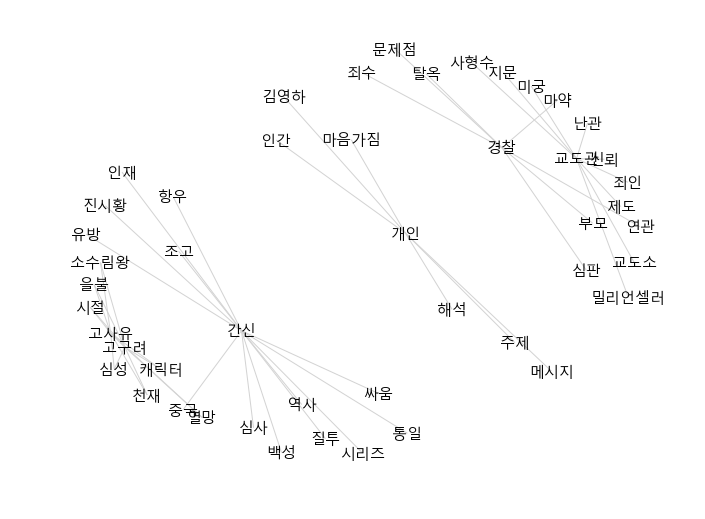

In [128]:
G = networkx.Graph() # 그래프 생성

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight) # 노드간의 연결선을 추가(단어간의 관계)
    edge_set.add((word1, word2))
# spring_layout : edge를 스프링처럼 사용하여 단어간의 자성이 있는 것처럼 밀어내거나 당기는 물리학 시뮬레이션으로 위치를 나타냄
# 서로 연결이 잘 되있을수록 가깝게 연결되어 나옴
# 항상 랜덤이다
# iterations 가 커질수록 안정적으로 나온다.
position = networkx.spring_layout(G, iterations=30) 
plt.figure(figsize=(12, 9)) # 그래프 크기
networkx.draw_networkx_nodes(G, position, node_size=0) # 노드추가
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray') # edge 추가
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic') # 노드의 단어
plt.axis('off')
plt.show()


In [42]:
conn.close()